In [16]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [15]:
columns = ['month', 'day', 'time', 'i_cost', 'i_1p', 'i_climate', 'abs_comp', 'abs_opt', 'rel_comp', 'rel_opt']
gerben = pd.read_csv('gerben_output/aa_high_potential_list_sorted_rel_climate.txt', header=None, names=columns)
# atr_array =pd.read_csv('partial_output/ATRsum-July-1-week.csv')
atr_array = pd.read_csv('partial_output/ATRsum-2018-July-whole-Night.csv')
day_range = 32

date_list = []

#converts the dates into a normal format
for i in range(len(gerben)):
    date_list.append(datetime.date(2018, gerben['month'].values[i], 1 + gerben['day'].values[i]))
#converts from datetime.date to string
date_strings = [date.strftime("%Y-%m-%d") for date in date_list]
#drops the useless month/day
gerben_no_date = gerben.drop(axis=1, columns=['month', 'day'])
#inserts better string date
gerben_no_date.insert(loc=0, column='Date', value=date_strings)
#yeets out the crap we won't use
gerben_new = gerben_no_date.drop(axis=1, columns=['abs_comp', 'abs_opt', 'rel_comp'])
gerben_midnight = gerben_new[gerben_new['time'] != 1] # ---------------TO BE CHANGED FOR DAY-------------------
#funny dict goes brrrrrr
gerben_day = {}
atr_day = {}
#fill up the dicts

for i in range(1,day_range):
    gerben_day[f'gerben_day_{i:02d}'] = gerben_midnight[gerben_midnight['Date'] == f'2018-07-{i:02d}']
    atr_day[f'atr_day_{i:02d}'] = atr_array[atr_array['Date'] == f'2018-07-{i:02d}']
#sorts by values descending so it matches the gerben output in terms of correlation, i.e. the lower the rel_opt the higher ATRsum
for i in range(1,day_range):
    atr_day_temp = atr_day.get(f'atr_day_{i:02d}')
    atr_day_temp = atr_day_temp.sort_values(by='ATRsum', ascending=False)
    atr_day[f'atr_day_{i:02d}'] = atr_day_temp

#calculate the amount of flights that lie in the same halve
total_values = pd.DataFrame(columns=['Date', 'Correlation_Factor'])

for i in range(1,day_range):
    midpoint = len(atr_day.get(f'atr_day_{i:02d}')) // 2

    index_atr_1st_half = atr_day.get(f'atr_day_{i:02d}')['Flight_index'][:midpoint]
    index_atr_2nd_half = atr_day.get(f'atr_day_{i:02d}')['Flight_index'][midpoint:]

    index_gerben_1st_half = gerben_day.get(f'gerben_day_{i:02d}')['i_climate'][:midpoint]
    index_gerben_2nd_half = gerben_day.get(f'gerben_day_{i:02d}')['i_climate'][midpoint:]

    intersection_1st = set(index_atr_1st_half).intersection(set(index_gerben_1st_half))
    intersection_2nd = set(index_atr_2nd_half).intersection(set(index_gerben_2nd_half))
    total = float(len(intersection_1st) + len(intersection_2nd))/100
    total_values = total_values.append({'Date': f'2018-07-{i:02d}', 'Correlation_Factor': total}, ignore_index=True)

#calculate the average over the entire week
average = total_values['Correlation_Factor'].mean()

print(total_values)
print('Average =', average)


          Date  Correlation_Factor
0   2018-07-01                0.48
1   2018-07-02                0.66
2   2018-07-03                0.66
3   2018-07-04                0.54
4   2018-07-05                0.52
5   2018-07-06                0.68
6   2018-07-07                0.58
7   2018-07-08                0.52
8   2018-07-09                0.56
9   2018-07-10                0.60
10  2018-07-11                0.64
11  2018-07-12                0.64
12  2018-07-13                0.56
13  2018-07-14                0.58
14  2018-07-15                0.68
15  2018-07-16                0.44
16  2018-07-17                0.58
17  2018-07-18                0.48
18  2018-07-19                0.54
19  2018-07-20                0.62
20  2018-07-21                0.58
21  2018-07-22                0.60
22  2018-07-23                0.74
23  2018-07-24                0.54
24  2018-07-25                0.50
25  2018-07-26                0.40
26  2018-07-27                0.42
27  2018-07-28      

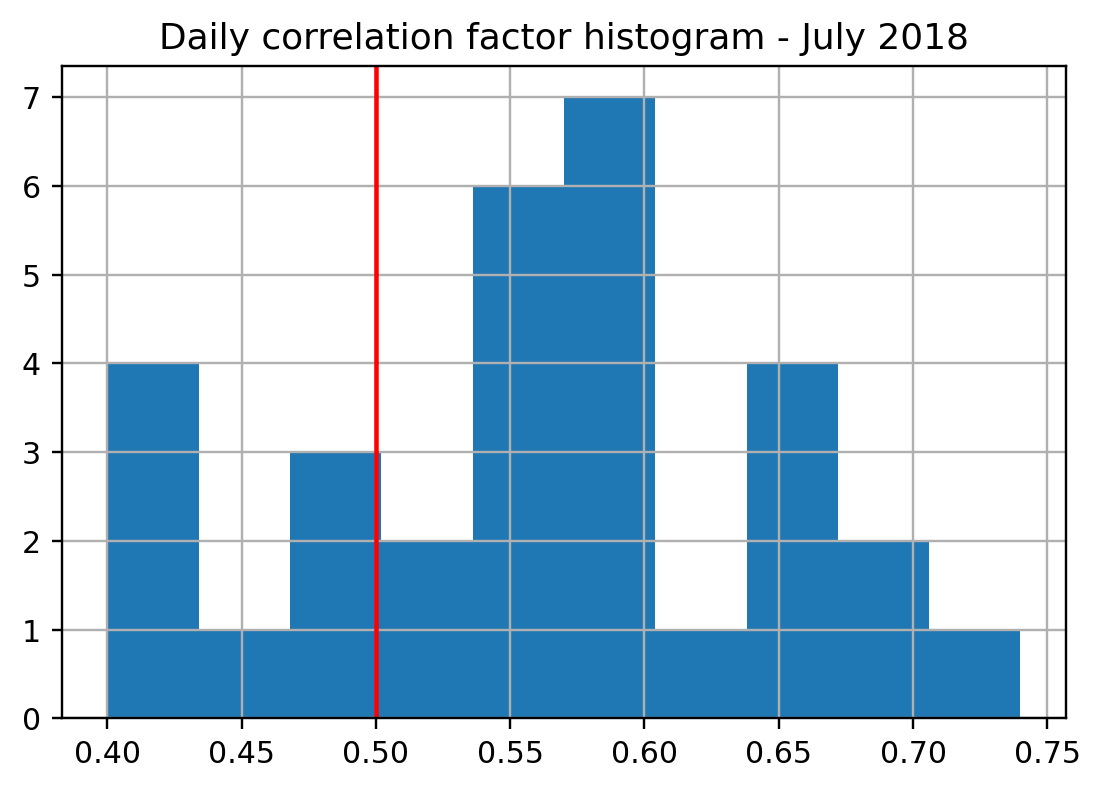

In [27]:
total_values['Correlation_Factor'].hist(bins=10)
# plt.ylabel('Occurence in July 2018')
# plt.xlabel('Correlation factor')
plt.title('Daily correlation factor histogram - July 2018')
plt.axvline(x=0.5, c='r')